# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

Student Name and ID: **Kundana Vaka - 1001827398**


## Programming Assignment Submission Instructions ( 2 Points)


Step 3: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

## Programming Assignment Details (25 Points)



For this assignment use Jupyter notebook, Panda, and scikit.

1) Load wine dataset from sklearn datasets. [1 points]

2) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]

3) Select only 2 attributes for training and testing your model. [2 points]

4) Use Euclidean distance. [3 points]

5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]

6) Use comments to explain your code and variable names.[2 points]

7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and
support) for all three different numbers.[6 points]

8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

## Report (20 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:


1) Describe the Nearest Neighbors method, [5 points]


2) Explain what was your criteria for selecting the two attributes, [5 points]


3) Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[5 points]


4) Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## Canvas Submission (2 Points)

Step 5 : Submit your zipped folder containing PA#2_Classification_yourLastName (PA#2_Classification_yourLastName.zip) on Canvas

In [ ]:
import sklearn
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd

In [ ]:
df = datasets.load_wine()

In [ ]:
df.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
x = df.data[:,:2]
y = df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, random_state=4)

In [ ]:
def knn(n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric="euclidean")
  knn.fit(x_train, y_train)
  y_pred_4 = knn.predict(x_test)
  print("For N =",n_neighbors," the confusion matrix is as follows:\n",confusion_matrix(y_test, y_pred_4))
  print('\nCLASSIFICATION REPORT\n')
  print(classification_report(y_test, y_pred_4,target_names= df.target_names))
  print("Accuracy score:",accuracy_score(y_test, y_pred_4))
  plot_knn(n_neighbors, x,y,knn)

In [ ]:
def plot_knn(n_neighbours,x,y,clf):
    h = .02
    # Creating color maps
    cmap_colors = ListedColormap(['#FFC0CB', '#0000FF','#FF0000'])

    # fitting the data.
    clf.fit(x, y)

    # calculating the  minimum, maximum and limits
    min_x, max_x = x[:, 0].min() - 1, x[:, 0].max() + 1
    min_y, max_y = x[:, 1].min() - 1, x[:, 1].max() + 1
    x_f, y_f = np.meshgrid(np.arange(min_x, max_x, h),
    np.arange(min_y, max_y, h))

    # predicting using the classifer
    f = clf.predict(np.c_[x_f.ravel(), y_f.ravel()])

    # color plot
    f = f.reshape(x_f.shape)
    plt.figure()
    plt.pcolormesh(x_f, y_f, f, cmap=cmap_colors)

    # Plotting
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.xlim(x_f.min(), x_f.max())
    plt.ylim(y_f.min(), y_f.max())
    plt.title("Three - Class Classification (k = %i)" % (n_neighbours))
    plt.show()

For N = 4  the confusion matrix is as follows:
 [[16  0  2]
 [ 0 18  1]
 [ 2  3 12]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.86      0.95      0.90        19
     class_2       0.80      0.71      0.75        17

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54

Accuracy score: 0.8518518518518519


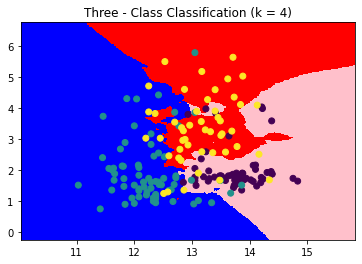

In [ ]:
knn(4)

For N = 6  the confusion matrix is as follows:
 [[16  0  2]
 [ 1 17  1]
 [ 2  3 12]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class_0       0.84      0.89      0.86        18
     class_1       0.85      0.89      0.87        19
     class_2       0.80      0.71      0.75        17

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54

Accuracy score: 0.8333333333333334


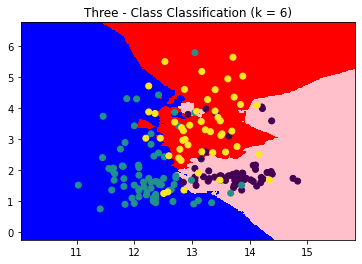

In [ ]:
knn(6)

For N = 8  the confusion matrix is as follows:
 [[15  0  3]
 [ 1 17  1]
 [ 2  3 12]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class_0       0.83      0.83      0.83        18
     class_1       0.85      0.89      0.87        19
     class_2       0.75      0.71      0.73        17

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54

Accuracy score: 0.8148148148148148


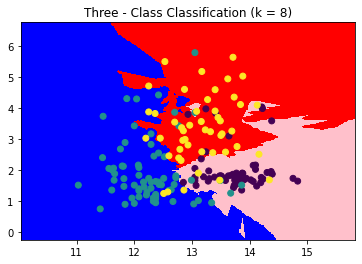

In [ ]:
knn(8)